In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [6]:
# 1. Generate a Non-Linear Dataset (Parabolic)
np.random.seed(42)
X = 6 * np.random.rand(1000, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(1000, 1)   # np.random is noise

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
#--Simple Linear Regression--
linear = LinearRegression()
linear.fit(X_train, y_train)
y_pred = linear.predict(X_test)

In [9]:
#--Polynomi Linear Regression--
# Transform X to [1, x, x²]
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred_poly = poly_reg.predict(X_test_poly)

In [10]:
#--Metrics Evaluations--
def print_metrics(name, y_true, y_pred):
  mse = mean_squared_error(y_true, y_pred)
  r2 = r2_score(y_true, y_pred)
  print(f"--- {name} ---")
  print(f"MSE: {mse:.4f}")
  print(f"R² Score: {r2:.4f}\n")

In [13]:
print_metrics("Simple Linear Regression", y_test, y_pred)
print_metrics("Polynomial Regression (Deg 2)", y_test, y_pred_poly)

--- Simple Linear Regression ---
MSE: 2.8620
R² Score: 0.4328

--- Polynomial Regression (Deg 2) ---
MSE: 0.8627
R² Score: 0.8290



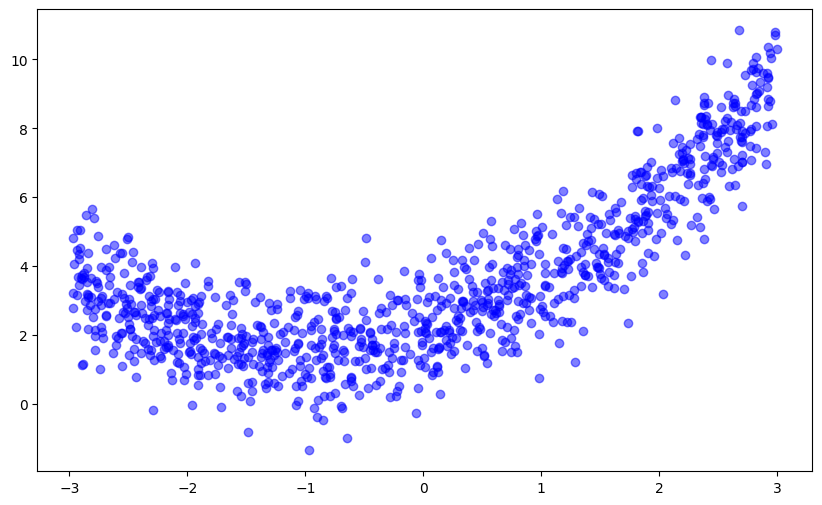

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data', alpha=0.5)

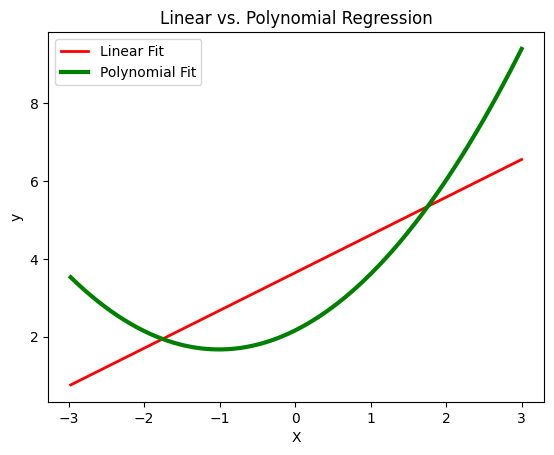

In [16]:
X_sorted = np.sort(X, axis=0)
y_linear_sorted = linear.predict(X_sorted)
y_poly_sorted = poly_reg.predict(poly_features.transform(X_sorted))
plt.plot(X_sorted, y_linear_sorted, color='red', label='Linear Fit', linewidth=2)
plt.plot(X_sorted, y_poly_sorted, color='green', label='Polynomial Fit', linewidth=3)

plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear vs. Polynomial Regression")
plt.legend()
plt.show()